# Step 1. Importing packages

In [1]:
import tensorflow as tf # For defining and training the neural network
import numpy as np # For convenient use of high-dimensional arrays
from keras import datasets # For loading the MNIST dataset

# To make things look easy
from utils import show_image, to_vectors

print(f'Using TensorFlow {tf.__version__}')
np.set_printoptions(precision=3)

Using TensorFlow 2.12.0


# Step 2. Loading and displaying the MNIST dataset

In [2]:
(X, y), _ = datasets.mnist.load_data()

# To have activations in range (0, 1), 
# we divide everything by 255.0 (since grayscale colors 
# are specified in uint8 format which ranges from 0 to 255
X = X / 255.0

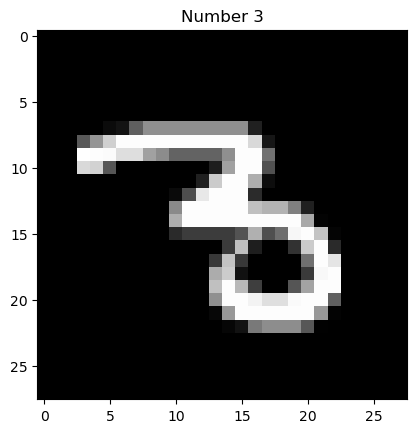

In [3]:
index = 30 # Put your own index to play around
show_image(X[index], y[index])

# Step 3. Defining the neural network structure

In [4]:
neural_network = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(
        32,
        name='hidden_layer',
        activation='sigmoid'
    ),
    tf.keras.layers.Dense(
        10,  
        name="output_layer",
        activation='sigmoid'
    )
])
neural_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden_layer (Dense)        (None, 32)                25120     
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [5]:
y_vectors = to_vectors(y)
print(f'label in the original format: {y[0]}')
print(f'label in the vector format: {y_vectors[0]}')

label in the original format: 5
label in the vector format: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5)
neural_network.compile(loss='mse', optimizer=optimizer)
neural_network.fit(
    X, 
    y_vectors,
    epochs=30,
    verbose=1,
    validation_split=0.2
)

Epoch 1/30
  92/1500 [>.............................] - ETA: 0s - loss: 0.2664  

2024-01-18 22:58:13.607291: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 1s 640us/step - loss: 0.2051 - val_loss: 0.1609
Epoch 2/30
1500/1500 [==============================] - 1s 572us/step - loss: 0.1389 - val_loss: 0.1221
Epoch 3/30
1500/1500 [==============================] - 1s 576us/step - loss: 0.1117 - val_loss: 0.1030
Epoch 4/30
1500/1500 [==============================] - 1s 572us/step - loss: 0.0976 - val_loss: 0.0926
Epoch 5/30
1500/1500 [==============================] - 1s 573us/step - loss: 0.0894 - val_loss: 0.0861
Epoch 6/30
1500/1500 [==============================] - 1s 581us/step - loss: 0.0840 - val_loss: 0.0814
Epoch 7/30
1500/1500 [==============================] - 1s 586us/step - loss: 0.0797 - val_loss: 0.0774
Epoch 8/30
1500/1500 [==============================] - 1s 591us/step - loss: 0.0759 - val_loss: 0.0736
Epoch 9/30
1500/1500 [==============================] - 1s 620us/step - loss: 0.0723 - val_loss: 0.0702
Epoch 10/30
1500/1500 [==============================] - 1s 650us/step - lo

Prediction in raw format: [[0.056 0.174 0.115 0.167 0.09  0.391 0.038 0.02  0.303 0.039]]


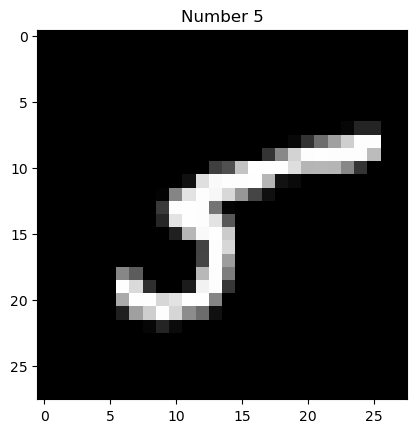

In [8]:
# Making prediction
index = 65 # Put your own index to play around
prediction = neural_network.predict(np.expand_dims(X[index], axis=0), verbose=0)

# Displaying results
print(f'Prediction in raw format: {prediction}')
show_image(X[index], np.argmax(prediction[0]))